<a href="https://colab.research.google.com/github/neharikajsh/Titanic_Data_Evaluation/blob/main/Titanic_Data_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, mean_squared_error,roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# The Data

In [4]:
train_data = pd.read_csv('https://raw.githubusercontent.com/neharikajsh/Titanic_Data_Evaluation/main/data/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data = pd.read_csv('https://raw.githubusercontent.com/neharikajsh/Titanic_Data_Evaluation/main/data/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
filtered_test_data = test_data.drop('Cabin', axis=1)
filtered_test_data.dropna(inplace = True)
filtered_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# Exploratory Data Analysis

In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Dropping Data with Higher null values

In [8]:
filtered_data = train_data.drop('Cabin', axis=1)
filtered_data.dropna(inplace = True)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


### Label (Survived) Column

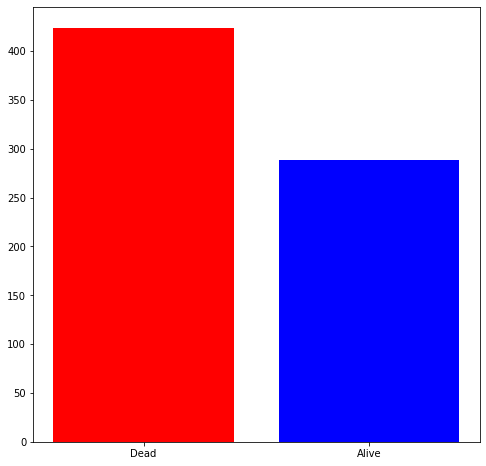



0    424
1    288
Name: Survived, dtype: int64


In [9]:
category_classes = filtered_data['Survived'].unique()
category_counts = []

for i in category_classes:
  count = len(filtered_data[filtered_data.Survived==i])
  category_counts.append(count)

plt.figure(figsize=(8, 8))
plt.bar(['Dead','Alive'],category_counts,color=['red','blue'])
plt.show()

print('\n')
print(filtered_data['Survived'].value_counts())

### **Gender Column**

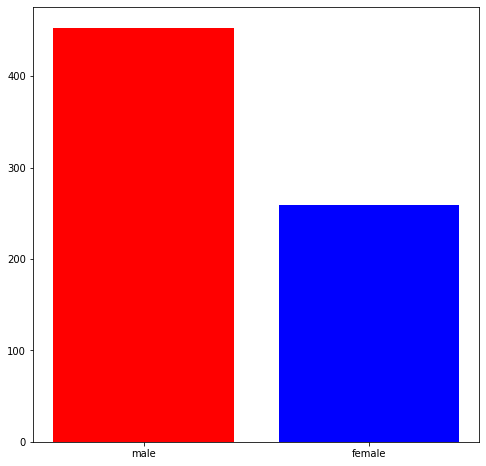



male      453
female    259
Name: Sex, dtype: int64


In [10]:
category_classes = filtered_data['Sex'].unique()
category_counts = []

for i in category_classes:
  count = len(filtered_data[filtered_data.Sex==i])
  category_counts.append(count)

plt.figure(figsize=(8, 8))
plt.bar(category_classes,category_counts,color=['red','blue'])
plt.show()

print('\n')
print(filtered_data['Sex'].value_counts())

**The number of males present in the ship is almost twice as those who were female.**

### **Ticket Class**

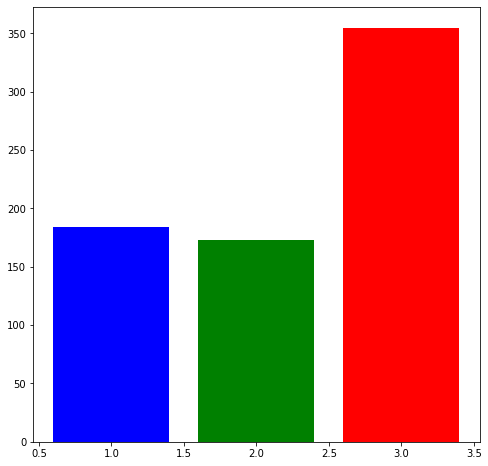



3    355
1    184
2    173
Name: Pclass, dtype: int64


In [11]:
category_classes = filtered_data['Pclass'].unique()
category_counts = []

for i in category_classes:
  count = len(filtered_data[filtered_data.Pclass==i])
  category_counts.append(count)

plt.figure(figsize=(8, 8))
plt.bar(category_classes,category_counts,color=['red','blue','green'])
plt.show()

print('\n')
print(filtered_data['Pclass'].value_counts())

**It seems like 3rd class tickets had a huge number compared to 1st and 2nd class tickets.**

# **Building the Model**

In [14]:
data_labelencoded = filtered_data.copy()
data_labelencoded_test = filtered_test_data.copy()

lblEncoder_X = LabelEncoder()   
data_labelencoded['Sex'] = lblEncoder_X.fit_transform(data_labelencoded['Sex'])
data_labelencoded['Embarked'] = lblEncoder_X.fit_transform(data_labelencoded['Embarked']) 
data_labelencoded_test['Sex'] = lblEncoder_X.fit_transform(filtered_test_data['Sex'])
data_labelencoded_test['Embarked'] = lblEncoder_X.fit_transform(filtered_test_data['Embarked']) 

feature_columns=['Pclass','Sex','Fare','Embarked']
# data_labelencoded = data_labelencoded.sample(600)
X_train = np.array(data_labelencoded[feature_columns])
y_train = np.array(data_labelencoded[['Survived']])

X_test = np.array(data_labelencoded_test[feature_columns])
# y_test = np.array(data_labelencoded_test[['Survived']])

degree = 3
poly = PolynomialFeatures(degree, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly_stded = scaler.transform(X_train_poly)
X_test_poly_stded = scaler.transform(X_test_poly)

**The features that is best for predicting on the basis of correlation is Pclass, Sex, Fare, Embarked.**

In [15]:
filtered_data['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [16]:
import imblearn.under_sampling as under
from sklearn.utils import resample

df_one = filtered_data[(filtered_data['Survived']==1)]
df_zero = filtered_data[(filtered_data['Survived']==0)]
df_one_undersampled = resample(df_one,
                              replace=True,
                              n_samples= len(df_zero),
                              random_state=42)

df_undersampled = pd.concat([df_one_undersampled, df_zero])

category_counts_u=[]
survived_classes = filtered_data['Survived'].unique()
for i in survived_classes:
  count = len(df_undersampled[df_undersampled['Survived']==i])
  category_counts_u.append(count)

df_undersampled['Survived'].value_counts()

1    424
0    424
Name: Survived, dtype: int64

In [18]:
# dtc = DecisionTreeClassifier(criterion= 'entropy', 
#                              max_leaf_nodes= 22, 
#                              min_samples_split= 4)
dtc = DecisionTreeClassifier()
dtcmodel = dtc.fit(X_train_poly_stded, y_train)

y_pred = dtcmodel.predict(X_test_poly_stded)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,